# ***Загрузка данных***

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy import stats
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [85]:
# монтируем связь с google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
# Загружаем данные из Excel-файла
data_df = pd.read_excel('/content/drive/MyDrive/Данные_для_курсовои_Классическое_МО.xlsx')

# Выводим первые 5 строк DataFrame
print(data_df.head())

   Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           2.627117   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928571   
1        3.961417           0.533868        0.533868  0.462473  45.214286   
2        2.627117           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377846  41.862069   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0           

In [87]:
# размерность данных
print("Рамерность данныз",data_df.shape)

Рамерность данныз (1001, 214)


Датасет состоит из 1001 записи, содержащей 214 признаков.

Вот некоторые из них:

IC50, mM — концентрация, необходимая для ингибирования 50% активности мишени (например, фермента или клеточного роста)., в миллимолях.


CC50, mM — необходимую концентрацию вещества, которая приводит к половинному снижению жизнеспособности клетоk, в миллимолях.

SI — определяется как отношение CC50 к IC50 и используется для оценки избирательности антиканцерогенных препаратов или токсичных веществ к опухолевым клеткам по сравнению с нормальными. Это соотношение даёт понимание того, насколько безопасен препарат для здоровых клеток в сравнении с его действием на раковые клетки.

qed — Quantitative Estimate of Drug-likeness — количественная оценка "лекарственности" молекулы.

MaxAbsEStateIndex — м один из индексов, используемых в количественной структуре-активностной связи (QSAR) для оценки взаимодействия молекул с биологическими мишенями и их оценочной активности.

MaxEStateIndex — это индекс, используемый в области количественной структуры-активности (QSAR) для оценки взаимодействия молекул с биологическими мишенями и их потенциальной активности.

MinAbsEStateIndex — минимальное значение абсолютного значения EState, которое учитывает электростатические взаимодействия и структурные характеристики молекул..

MinEStateIndex — индекс, используемый в количественной структуре-активности (QSAR), который помогает исследовать и предсказать биологическую активность молекул на основе их структурных характеристик. Этот индекс фокусируется на минимальных значениях электроника-структурных свойств молекул и играет ключевую роль в оценке их взаимодействий с биологическими мишенями..

SPS — Surface Polar Score — мера полярности молекулярной поверхности (иногда в смысле структурной сложности).

fr_sulfide — содержит сульфидную группу (–S–).

fr_sulfonamd — содержит сульфонамидную группу (–SO₂–NH₂).

fr_sulfone — содержит сульфон (–SO₂–).

fr_term_acetylene — содержит терминальный ацетилен (концевая ≡C–H группа).

fr_tetrazole — содержит тетразольное кольцо.

fr_thiazole — содержит тиазольное кольцо.

fr_thiocyan — содержит тиоцианат (–SCN).

fr_thiophene — содержит тиофен.

fr_unbrch_alkane — содержит неразветвлённую алкановую цепь.

fr_urea — содержит мочевину (–NH–CO–NH–).

In [88]:
# Информация об обучающем датафрейме
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [89]:
# Описание набора данных
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1001.0,500.000000,289.108111,0.000000,250.000000,500.000000,750.000000,1000.000000
"IC50, mM",1001.0,222.805156,402.169734,0.003517,12.515396,46.585183,224.975928,4128.529377
"CC50, mM",1001.0,589.110728,642.867508,0.700808,99.999036,411.039342,894.089176,4538.976189
SI,1001.0,72.508823,684.482739,0.011489,1.433333,3.846154,16.566667,15620.600000
MaxAbsEStateIndex,1001.0,10.831637,3.307505,2.321942,9.252350,12.179236,13.167843,15.933463
...,...,...,...,...,...,...,...,...
fr_thiazole,1001.0,0.051948,0.222033,0.000000,0.000000,0.000000,0.000000,1.000000
fr_thiocyan,1001.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_thiophene,1001.0,0.069930,0.255157,0.000000,0.000000,0.000000,0.000000,1.000000
fr_unbrch_alkane,1001.0,0.204795,1.215326,0.000000,0.000000,0.000000,0.000000,20.000000


In [90]:
missing_columns = data_df.columns[data_df.isnull().any()]

print("Колонки с пропущенными значениями:")
print(missing_columns)

Колонки с пропущенными значениями:
Index(['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI',
       'BCUT2D_MRLOW'],
      dtype='object')


In [91]:
nan_counts =  data_df.isnull().sum()
nan_counts[nan_counts > 0]

,0
MaxPartialCharge,3
MinPartialCharge,3
MaxAbsPartialCharge,3
MinAbsPartialCharge,3
BCUT2D_MWHI,3
BCUT2D_MWLOW,3
BCUT2D_CHGHI,3
BCUT2D_CHGLO,3
BCUT2D_LOGPHI,3
BCUT2D_LOGPLOW,3


Так как величина пропуском не существенна - заполним их средними значениями.

In [92]:
# Заполнение пропущ енных значений медианными значениями
data_df.fillna(data_df.median(), inplace=True)

In [93]:
# Проверка на наличие пропущенных значений после заполнения
print(data_df.isnull().sum())

Unnamed: 0           0
IC50, mM             0
CC50, mM             0
SI                   0
MaxAbsEStateIndex    0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 214, dtype: int64


In [94]:
medians_map = {}

for i in ['IC50, mM', 'CC50, mM', 'SI']:
  medians_map[i] = data_df[i].median()

medians_map

{'IC50, mM': 46.58518345980803,
 'CC50, mM': 411.0393423370522,
 'SI': 3.846153846153846}

Проведем исследование показателей: IC50, CC50, SI как целевых показателей относительно других, используемых в датасете.

# **Анализ IC50**

In [95]:
target_column = 'IC50, mM'
data_df[target_column].describe()

,"IC50, mM"
count,1001.000000
mean,222.805156
std,402.169734
min,0.003517
25%,12.515396
50%,46.585183
75%,224.975928
max,4128.529377


Количество выбросов: 147


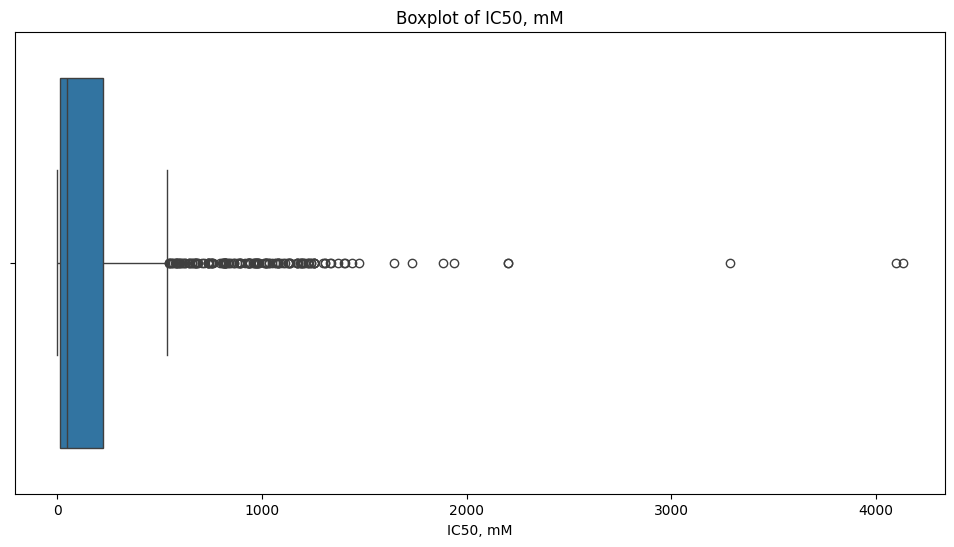

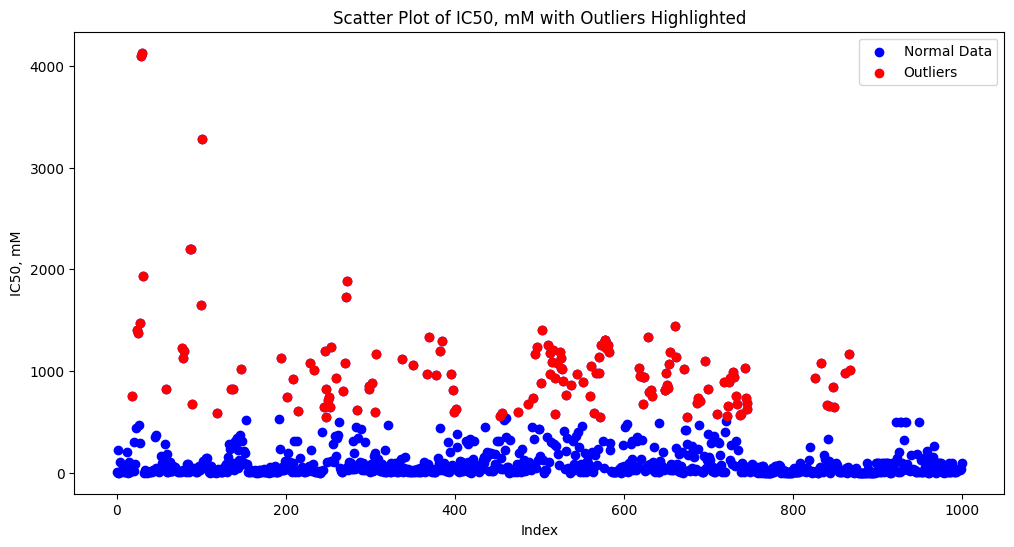

In [96]:
# Проведем анализ выбросов для данного показателя
# Вычисляем квартильные значения и интерквартильный размах (IQR)
Q1 = data_df[target_column].quantile(0.25)
Q3 = data_df[target_column].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выявляем выбросы
outliers = data_df[(data_df[target_column] < lower_bound) | (data_df[target_column] > upper_bound)]
print(f'Количество выбросов: {len(outliers)}')

# Визуализация с использованием box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_df[target_column])
plt.title('Boxplot of IC50, mM')
plt.xlabel('IC50, mM')
plt.show()

# Визуализация с использованием scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data_df.index, data_df[target_column], color='blue', label='Normal Data')

# Выделим выбросы
plt.scatter(outliers.index, outliers[target_column], color='red', label='Outliers')
plt.title('Scatter Plot of IC50, mM with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('IC50, mM')
plt.legend()
plt.show()


На представленных графиках видно, что значения IC50 имеют выбросы. Стандартными выбросами можно считать значения выше 542.28 и таких в датасете 147 записей. Экстриальными выбросами можно считать значения выше 1500 (примечание - значение подобранно визуально исходя из графика boxplot). Таких записей всего 8. На данном этапе очистим наш датасет от экстримальных выбросов.

In [97]:
# Удаляем выбросы, превышающие значение 1500
cleaned_data_df_IC50 = data_df[data_df[target_column] <= 1500]

# Выводим количество строк в очищенном наборе данных
print(f'Количество строк в очищенном наборе данных: {len(cleaned_data_df_IC50)}')

Количество строк в очищенном наборе данных: 992


Вычислим значение коэффициентов корреляции показателя IC50  с другими показателями датасета.  

In [98]:
def corr_analyze(dataf, target_column, corr_threshold=0.2):
    print('порог: ', corr_threshold)
    correlations = dataf.corr()[target_column]
    return {col: corr for col, corr in correlations.items() if col != target_column and abs(corr) >= corr_threshold}

corr_map = corr_analyze(cleaned_data_df_IC50, target_column, 0.2)
for col, corr in corr_map.items():
    print(f"Коэффициент корреляции между {target_column} и {col}: {corr}")

порог:  0.2
Коэффициент корреляции между IC50, mM и CC50, mM: 0.4120169500365593
Коэффициент корреляции между IC50, mM и MinEStateIndex: -0.25135757670955705
Коэффициент корреляции между IC50, mM и Chi2n: -0.23385383567272383
Коэффициент корреляции между IC50, mM и Chi2v: -0.23246783899801535
Коэффициент корреляции между IC50, mM и Chi3n: -0.2204441712847059
Коэффициент корреляции между IC50, mM и Chi3v: -0.22174609924694622
Коэффициент корреляции между IC50, mM и Chi4n: -0.22597954543764465
Коэффициент корреляции между IC50, mM и Chi4v: -0.22887381710518145
Коэффициент корреляции между IC50, mM и PEOE_VSA7: -0.23739300083561496
Коэффициент корреляции между IC50, mM и SMR_VSA4: -0.21785932131683866
Коэффициент корреляции между IC50, mM и SlogP_VSA5: -0.2434606159405115
Коэффициент корреляции между IC50, mM и EState_VSA8: -0.21087211971240827
Коэффициент корреляции между IC50, mM и VSA_EState4: -0.2848145205260985
Коэффициент корреляции между IC50, mM и VSA_EState7: -0.2127750082832662


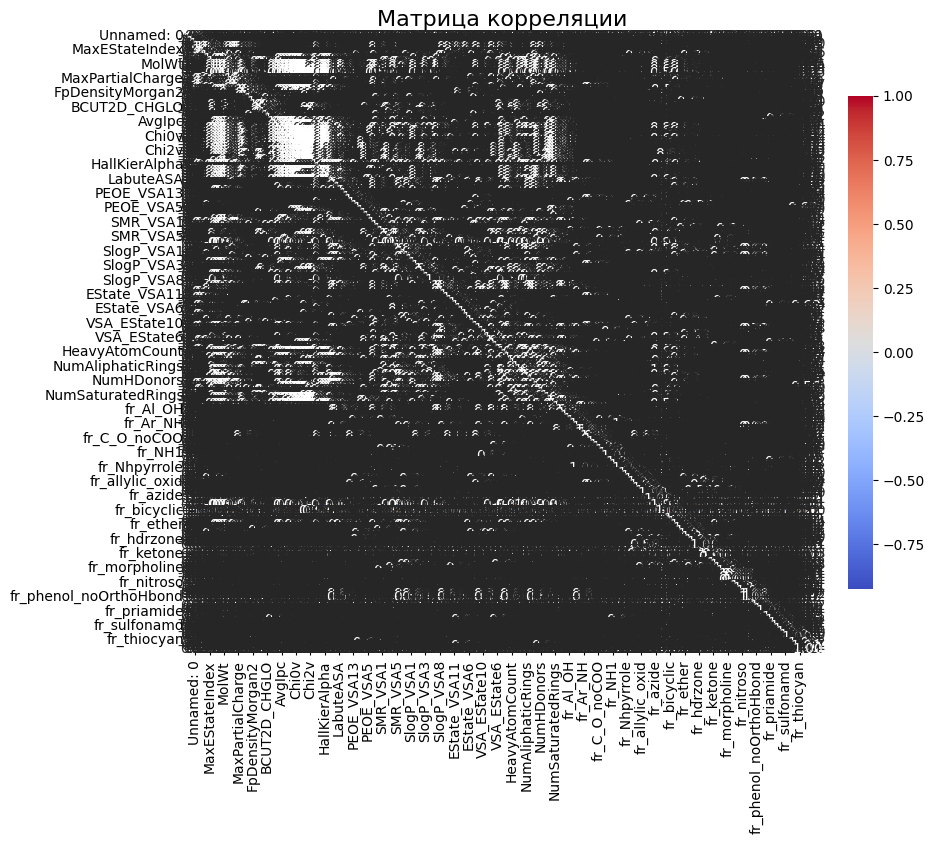

In [99]:
# Вычисление матрицы корреляции
correlation_matrix = cleaned_data_df_IC50.corr()

# Параметры графика
plt.figure(figsize=(10, 8))  # Размер графика
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)

# Название графика
plt.title('Матрица корреляции', fontsize=16)
plt.show()

In [100]:
# Преобразование в DataFrame для лучшего визуального отображения
correlation_df = pd.DataFrame(correlation_matrix)

# Отображение в виде таблицы
display(correlation_df)

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
Unnamed: 0,1.000000,-0.027490,-0.271995,0.047766,0.288796,0.288796,-0.126423,-0.206677,-0.043699,-0.165851,...,-0.007060,0.121284,0.055431,-0.023681,0.001599,-0.018406,NaN,0.023879,-0.097923,0.011357
"IC50, mM",-0.027490,1.000000,0.412017,-0.063754,0.130290,0.130290,-0.072240,-0.251358,0.147683,-0.089399,...,-0.064030,0.032215,0.022716,0.022287,0.071886,-0.082285,NaN,0.033253,-0.051341,0.019968
"CC50, mM",-0.271995,0.412017,1.000000,-0.003676,-0.114937,-0.114937,0.104227,0.022721,0.126762,0.115332,...,-0.091390,-0.041668,-0.004756,0.021070,0.019407,-0.075678,NaN,-0.035414,-0.008051,0.091346
SI,0.047766,-0.063754,-0.003676,1.000000,0.006051,0.006051,-0.055750,0.021110,0.040394,-0.004721,...,-0.019440,0.019160,-0.007412,-0.003278,-0.003335,-0.021544,NaN,-0.022335,-0.007612,-0.004941
MaxAbsEStateIndex,0.288796,0.130290,-0.114937,0.006051,1.000000,1.000000,-0.663555,-0.530681,-0.170604,-0.426074,...,-0.026829,0.059638,0.057152,-0.053211,0.011720,0.140281,NaN,0.111017,-0.206321,0.030792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiazole,-0.018406,-0.082285,-0.075678,-0.021544,0.140281,0.140281,-0.095543,0.046385,-0.267253,-0.147520,...,0.073937,-0.026026,-0.022505,-0.007471,-0.007471,1.000000,NaN,0.147133,-0.039838,-0.019828
fr_thiocyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_thiophene,0.023879,0.033253,-0.035414,-0.022335,0.111017,0.111017,-0.130662,0.063296,0.048901,-0.035038,...,-0.041759,-0.030490,-0.026365,-0.008753,-0.008753,0.147133,NaN,1.000000,-0.046671,-0.023228
fr_unbrch_alkane,-0.097923,-0.051341,-0.008051,-0.007612,-0.206321,-0.206321,0.247901,0.093192,-0.254294,0.024055,...,-0.019043,-0.018743,-0.016207,-0.005381,-0.005381,-0.039838,NaN,-0.046671,1.000000,-0.014279


Визуализируем данные на графики для целевой переменной IС50

In [101]:
def draw_scatterplots_for_correlations(dataf, target_column, corr_map):
  x_size = 3
  y_size = (len(corr_map.keys()) + x_size - 1) // x_size

  fig, axes = plt.subplots(y_size, x_size, figsize=(12, y_size * 4))
  axes = axes.flatten()

  cols_to_plot = list(corr_map.keys())

  for i, col in enumerate(cols_to_plot):
    axes[i].scatter(dataf[target_column], dataf[col], alpha=0.5)
    axes[i].set_title(f'{target_column} vs {col}')
    axes[i].set_xlabel(target_column)
    axes[i].set_ylabel(col)

  for j in range(len(cols_to_plot), len(axes)):
      fig.delaxes(axes[j])


  plt.tight_layout()
  plt.show()

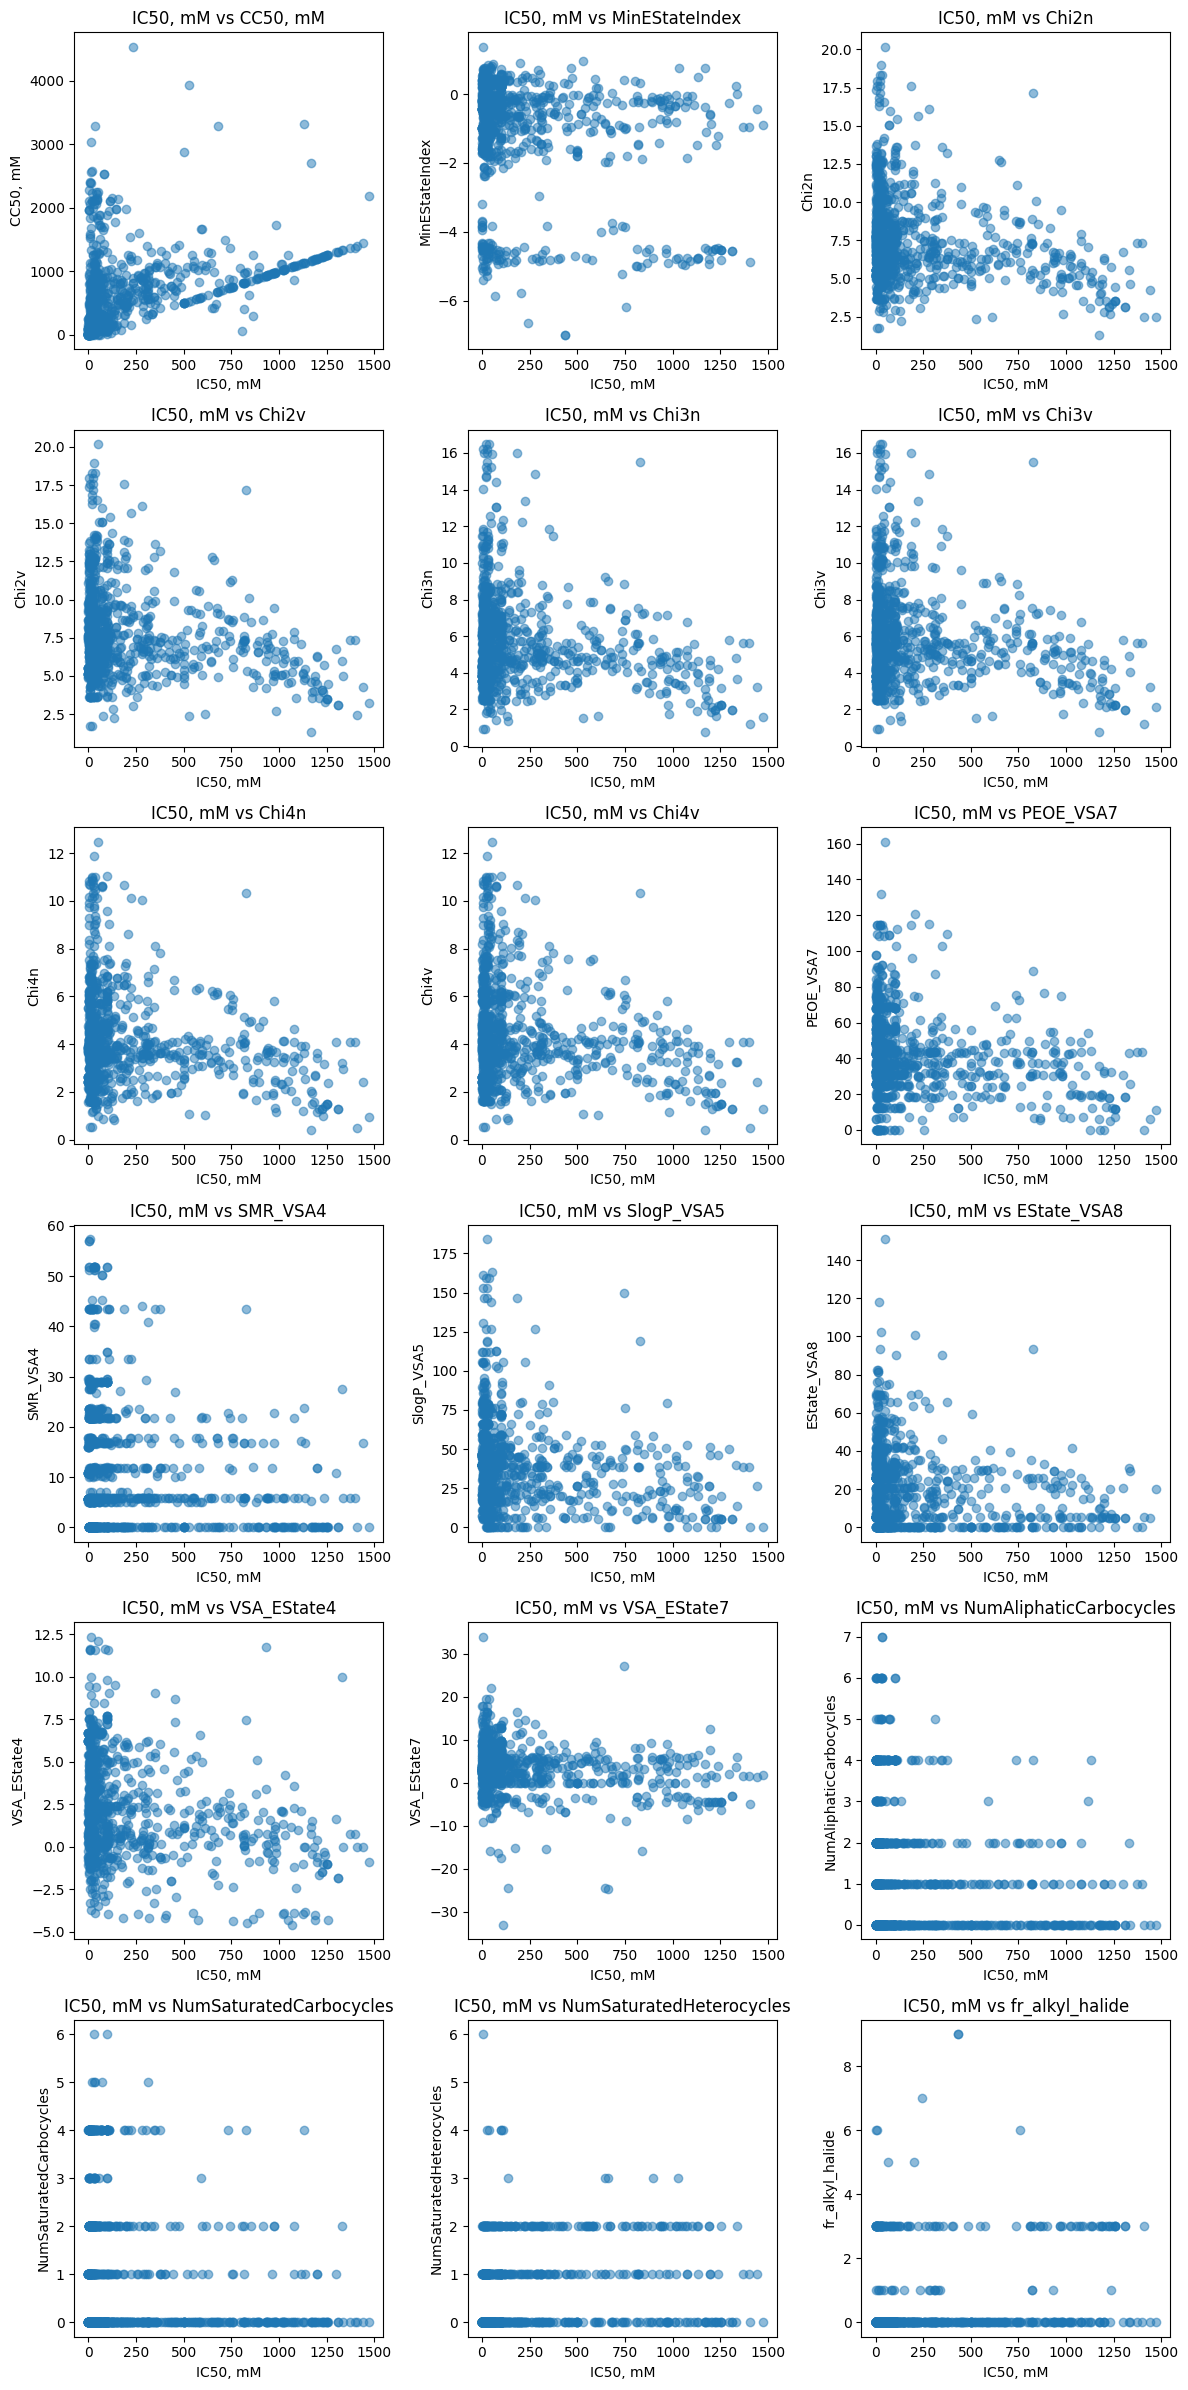

In [102]:
draw_scatterplots_for_correlations(cleaned_data_df_IC50, target_column, corr_map)

Заключение по результатам корреляционного анализа, видно что наш признак IC50 коррелирует c

- CC50, mM, корреляция = 0.4120169500365593  -  указывает на умеренную положительную связь между значениями IC50 и CC50 в миллимолях (mM). Это означает, что с увеличением значений IC50 возникает тенденция к увеличению значений CC50, хотя связь не является достаточно сильной.

- со всеми остальными показателями имеется незначительная положительная и отрицательная обратная связь.

# **Анализ CC50**

In [103]:
target_column_CC50 = 'CC50, mM'
data_df[target_column_CC50].describe()

,"CC50, mM"
count,1001.000000
mean,589.110728
std,642.867508
min,0.700808
25%,99.999036
50%,411.039342
75%,894.089176
max,4538.976189


Количество выбросов: 39


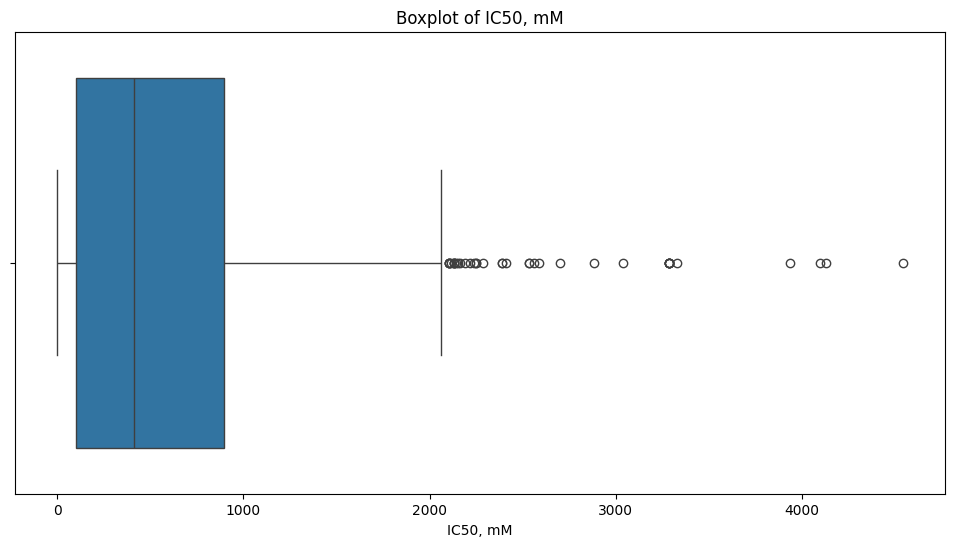

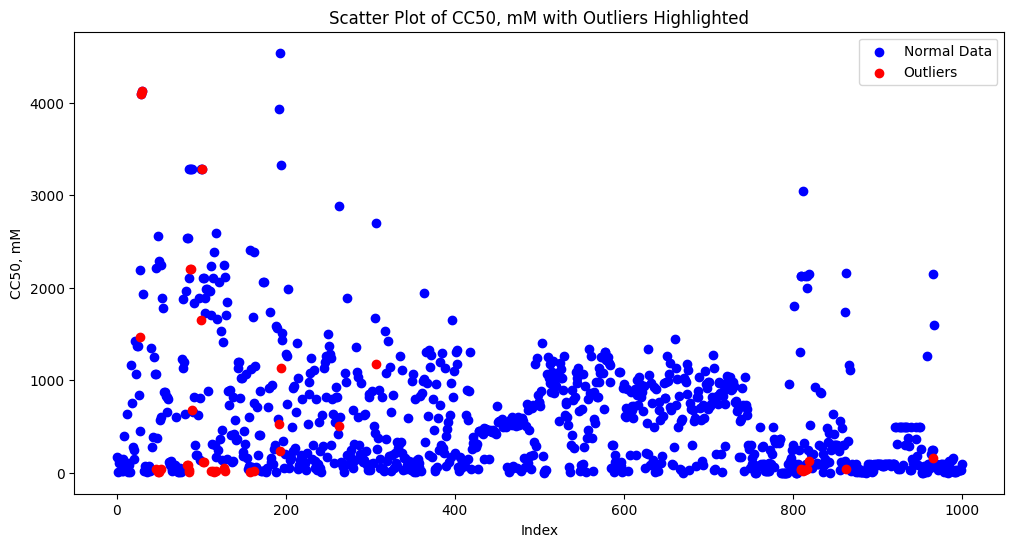

In [104]:
# Проведем анализ выбросов для данного показателя
# Вычисляем квартильные значения и интерквартильный размах (IQR)
Q1 = data_df[target_column_CC50].quantile(0.25)
Q3 = data_df[target_column_CC50].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выявляем выбросы
outliers = data_df[(data_df[target_column_CC50] < lower_bound) | (data_df[target_column_CC50] > upper_bound)]
print(f'Количество выбросов: {len(outliers)}')

# Визуализация с использованием box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_df[target_column_CC50])
plt.title('Boxplot of IC50, mM')
plt.xlabel('IC50, mM')
plt.show()

# Визуализация с использованием scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data_df.index, data_df[target_column_CC50], color='blue', label='Normal Data')

# Выделим выбросы
plt.scatter(outliers.index, outliers[target_column], color='red', label='Outliers')
plt.title('Scatter Plot of CC50, mM with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('CC50, mM')
plt.legend()
plt.show()

На представленных графиках видно, что значения СC50 имеют выбросы. Стандартными выбросами можно считать значения выше 2085 и таких в датасете 31 записей.

In [105]:
# Удаляем выбросы, превышающие значение 1500
cleaned_data_df_CC50 = data_df[data_df[target_column_CC50] <= 2085]

# Выводим количество строк в очищенном наборе данных
print(f'Количество строк в очищенном наборе данных: {len(cleaned_data_df_CC50)}')

Количество строк в очищенном наборе данных: 962


Вычислим значение коэффициентов корреляции показателя СC50 с другими показателями датасета.

In [106]:
def corr_analyze(dataf, target_colum_CC50, corr_threshold=0.2):
    print('порог: ', corr_threshold)
    correlations = dataf.corr()[target_column_CC50]
    return {col: corr for col, corr in correlations.items() if col != target_column_CC50 and abs(corr) >= corr_threshold}

corr_map = corr_analyze(cleaned_data_df_CC50, target_column_CC50, 0.2)
for col, corr in corr_map.items():
    print(f"Коэффициент корреляции между {target_column_CC50} и {col}: {corr}")

порог:  0.2
Коэффициент корреляции между CC50, mM и Unnamed: 0: -0.2500225185181851
Коэффициент корреляции между CC50, mM и IC50, mM: 0.5353769061565673
Коэффициент корреляции между CC50, mM и MolWt: -0.22127305582867515
Коэффициент корреляции между CC50, mM и HeavyAtomMolWt: -0.21718071696326846
Коэффициент корреляции между CC50, mM и ExactMolWt: -0.22121634529761727
Коэффициент корреляции между CC50, mM и NumValenceElectrons: -0.22034814212789794
Коэффициент корреляции между CC50, mM и FpDensityMorgan1: 0.2445722737800435
Коэффициент корреляции между CC50, mM и FpDensityMorgan2: 0.2249736118092571
Коэффициент корреляции между CC50, mM и Chi0: -0.22372636008057242
Коэффициент корреляции между CC50, mM и Chi0n: -0.21643403152001614
Коэффициент корреляции между CC50, mM и Chi0v: -0.21893298028438873
Коэффициент корреляции между CC50, mM и Chi1: -0.22180806343143863
Коэффициент корреляции между CC50, mM и Chi1n: -0.22019693236323756
Коэффициент корреляции между CC50, mM и Chi1v: -0.22598

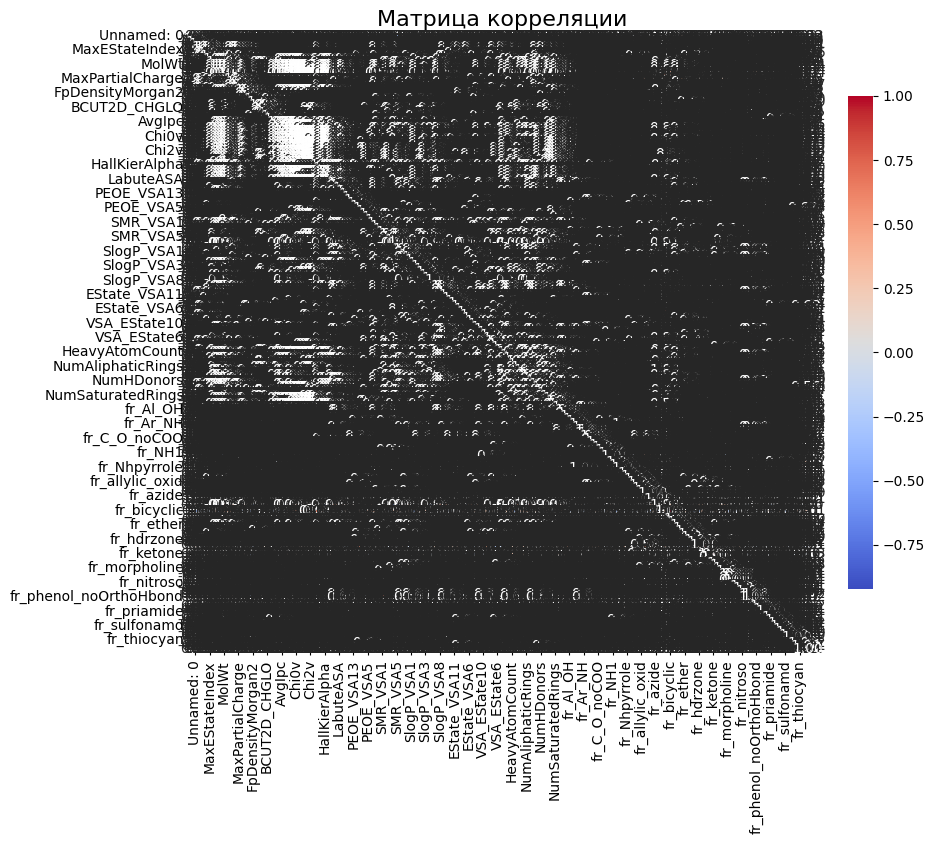

In [107]:
# Вычисление матрицы корреляции
correlation_matrix = cleaned_data_df_CC50.corr()

# Параметры графика
plt.figure(figsize=(10, 8))  # Размер графика
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)

# Название графика
plt.title('Матрица корреляции', fontsize=16)
plt.show()

In [108]:
# Преобразование в DataFrame для лучшего визуального отображения
correlation_df = pd.DataFrame(correlation_matrix)

# Отображение в виде таблицы
display(correlation_df)

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
Unnamed: 0,1.000000,-0.038183,-0.250023,0.052501,0.268657,0.268657,-0.102881,-0.188369,-0.033903,-0.148509,...,-0.005132,0.122241,0.054873,-0.025038,0.000944,-0.024114,NaN,0.018500,-0.091291,0.026699
"IC50, mM",-0.038183,1.000000,0.535377,-0.061392,0.124209,0.124209,-0.087253,-0.247050,0.151077,-0.092618,...,-0.081624,0.030030,0.020912,0.021435,0.070189,-0.084442,NaN,0.028632,-0.049283,0.027429
"CC50, mM",-0.250023,0.535377,1.000000,-0.010899,-0.052534,-0.052534,0.010033,-0.057041,0.164862,0.059725,...,-0.103282,-0.038114,0.006979,0.031234,0.029110,-0.064600,NaN,-0.007646,-0.024028,0.086049
SI,0.052501,-0.061392,-0.010899,1.000000,0.008484,0.008484,-0.058104,0.019864,0.039294,-0.006507,...,-0.018776,0.019402,-0.007225,-0.003216,-0.003274,-0.021103,NaN,-0.021820,-0.007637,-0.006951
MaxAbsEStateIndex,0.268657,0.124209,-0.052534,0.008484,1.000000,1.000000,-0.660760,-0.524053,-0.169198,-0.428434,...,-0.033413,0.058104,0.055938,-0.055091,0.011167,0.137392,NaN,0.106531,-0.204673,0.032751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiazole,-0.024114,-0.084442,-0.064600,-0.021103,0.137392,0.137392,-0.092393,0.051281,-0.269067,-0.144833,...,0.073979,-0.026866,-0.023230,-0.007711,-0.007711,1.000000,NaN,0.145410,-0.039836,-0.018938
fr_thiocyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_thiophene,0.018500,0.028632,-0.007646,-0.021820,0.106531,0.106531,-0.127652,0.069138,0.049460,-0.029521,...,-0.042796,-0.031484,-0.027223,-0.009037,-0.009037,0.145410,NaN,1.000000,-0.046683,-0.022193
fr_unbrch_alkane,-0.091291,-0.049283,-0.024028,-0.007637,-0.204673,-0.204673,0.255189,0.091042,-0.252319,0.022176,...,-0.018019,-0.018729,-0.016195,-0.005376,-0.005376,-0.039836,NaN,-0.046683,1.000000,-0.013202


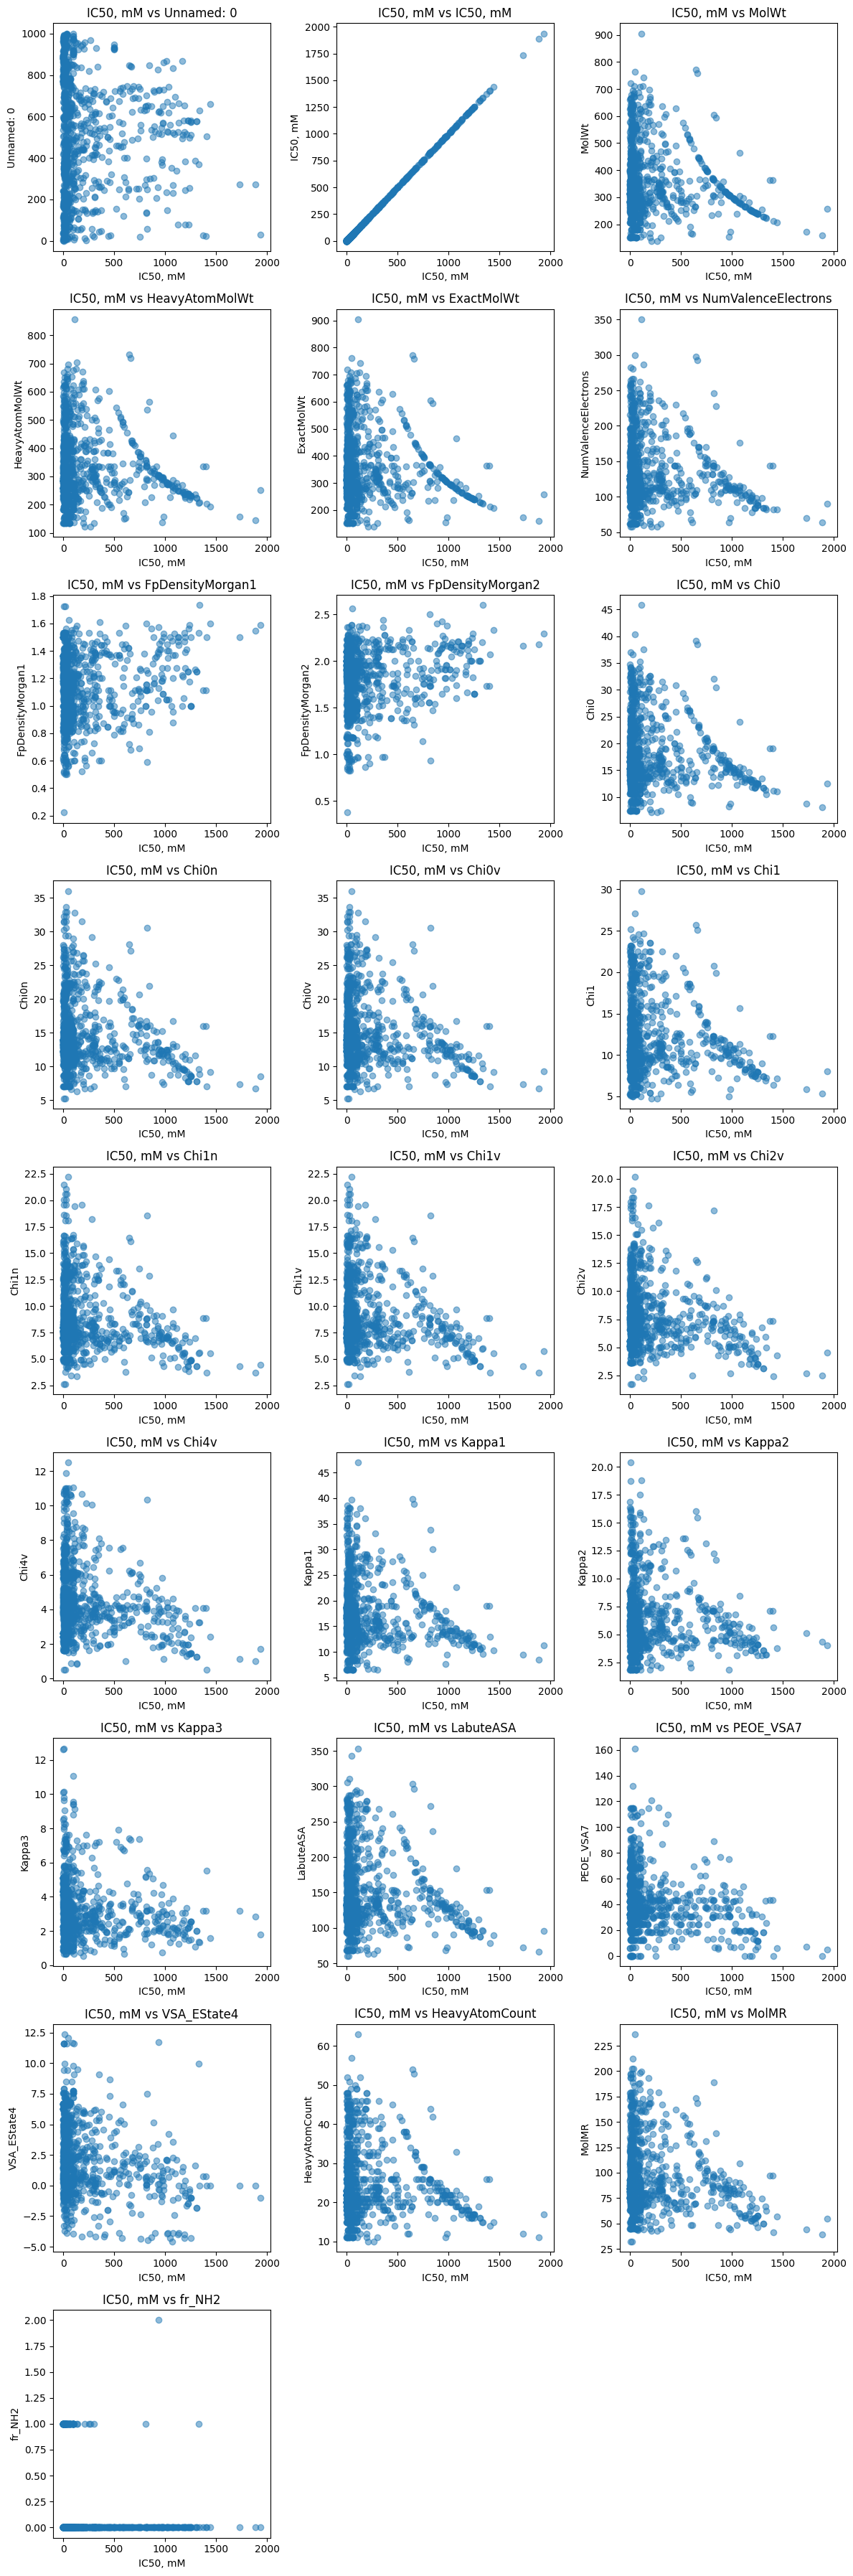

In [109]:
draw_scatterplots_for_correlations(cleaned_data_df_CC50, target_column, corr_map)

Заключение по результатам корреляционного анализа, видно что наш признак IC50 коррелирует c

- CC50, mM, корреляция = 0.5353769061565673 - указывает на умеренную положительную связь между значениями IC50 и CC50 в миллимолях (mM). Это означает, что с увеличением значений IC50 возникает тенденция к увеличению значений CC50, хотя связь не является достаточно сильной.

- со всеми остальными показателями имеется незначительная положительная и отрицательная обратная связь.

# **Анализ SI**

In [110]:
target_column_SI = 'SI'
data_df[target_column_SI].describe()

,SI
count,1001.000000
mean,72.508823
std,684.482739
min,0.011489
25%,1.433333
50%,3.846154
75%,16.566667
max,15620.600000


In [111]:
df_si = data_df[data_df['IC50, mM']<=1500]
df_si = df_si[df_si['CC50, mM']<=2085]

df_si['SI'].describe()

,SI
count,959.000000
mean,71.986853
std,698.739928
min,0.011489
25%,1.419214
50%,3.629442
75%,14.565831
max,15620.600000


Количество выбросов: 121


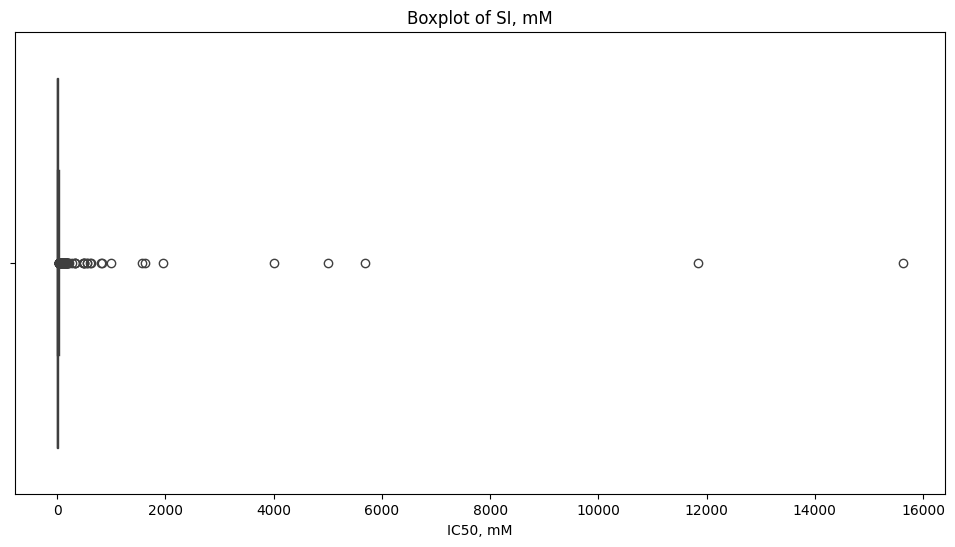

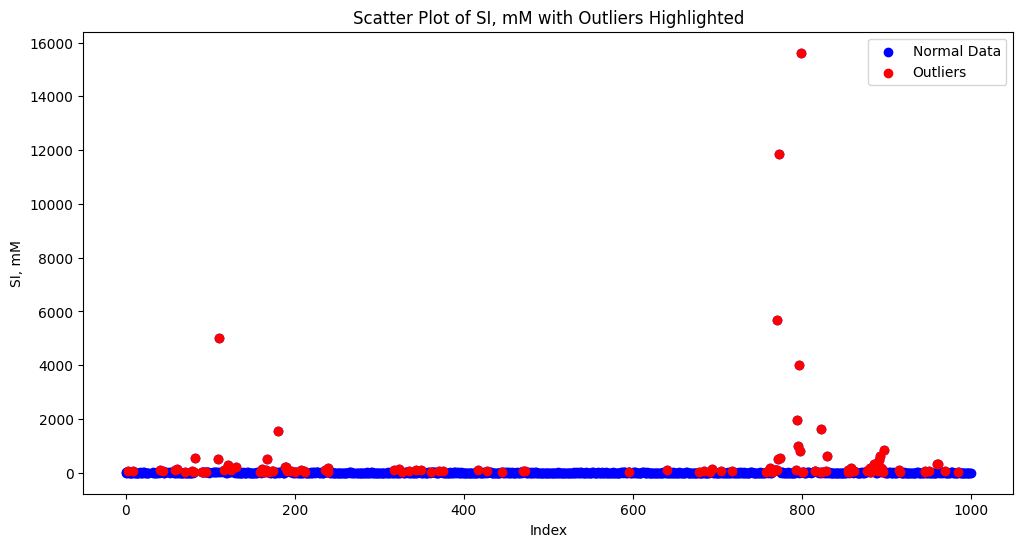

In [83]:
# Проведем анализ выбросов для данного показателя
# Вычисляем квартильные значения и интерквартильный размах (IQR)
Q1 = df_si[target_column_SI].quantile(0.25)
Q3 = df_si[target_column_SI].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выявляем выбросы
outliers = df_si[(df_si[target_column_SI] < lower_bound) | (df_si[target_column_SI] > upper_bound)]
print(f'Количество выбросов: {len(outliers)}')

# Визуализация с использованием box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_si[target_column_SI])
plt.title('Boxplot of SI, mM')
plt.xlabel('IC50, mM')
plt.show()

# Визуализация с использованием scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_si.index, df_si[target_column_SI], color='blue', label='Normal Data')

# Выделим выбросы
plt.scatter(outliers.index, outliers[target_column_SI], color='red', label='Outliers')
plt.title('Scatter Plot of SI, mM with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('SI, mM')
plt.legend()
plt.show()

На представленных графиках видно, что значения SI имеют выбросы. Стандартными выбросами можно считать значения выше 39,266 и таких в датасете 121 записей.
Так как доля записей составляет 13%, что может сильно повлиять на результаты прогнозирования на моделях.

In [116]:
def corr_analyze(dataf, target_column_SI, corr_threshold=0.2):
    print('порог: ', corr_threshold)
    correlations = dataf.corr()[target_column_SI]
    return {col: corr for col, corr in correlations.items() if col != target_column_SI and abs(corr) >= corr_threshold}

corr_map = corr_analyze(df_si, target_column_SI, 0.15)
for col, corr in corr_map.items():
    print(f"Коэффициент корреляции между {target_column_SI} и {col}: {corr}")

порог:  0.15
Коэффициент корреляции между SI и BalabanJ: 0.16780628167614275
Коэффициент корреляции между SI и fr_NH2: 0.16459839229266923


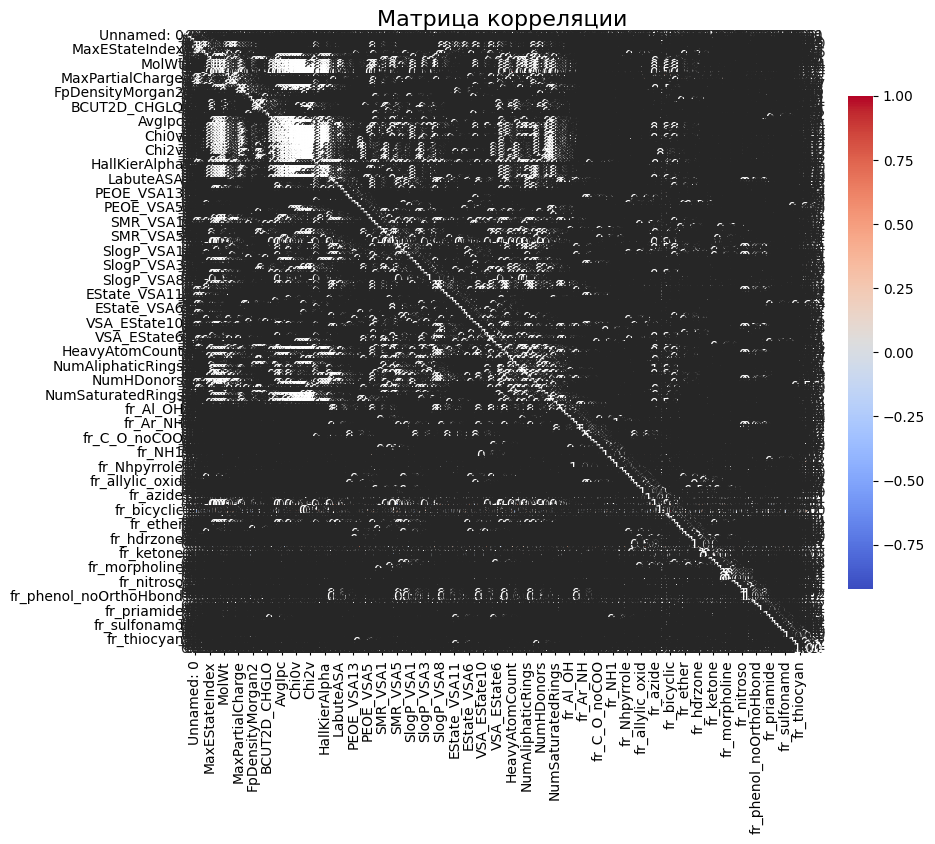

In [80]:
# Вычисление матрицы корреляции
correlation_matrix = data_df.corr()

# Параметры графика
plt.figure(figsize=(10, 8))  # Размер графика
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)

# Название графика
plt.title('Матрица корреляции', fontsize=16)
plt.show()

Заключение - у показателя SI наблюдается с остальными показателями незначительная положительная и отрицательная обратная связь